In [17]:
import layoutparser as lp
import numpy as np
import pytesseract as pt
import cv2
import os
import re

from pytesseract import Output
from PIL import Image

In [5]:
image = cv2.imread("test.png")
image = image[..., ::-1]

In [6]:
model = lp.Detectron2LayoutModel('lp://HJDataset/mask_rcnn_R_50_FPN_3x/config',model_path="/Users/bitan/.torch/iopath_cache/s/893paxpy5suvlx9/model_final.pth")

In [7]:
layout = model.detect(image)

/Users/bitan/.pyenv/versions/3.9.9/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


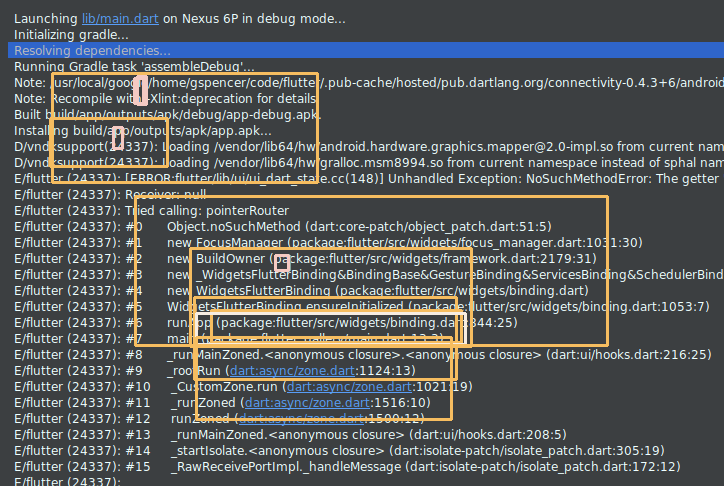

In [8]:
lp.draw_box(image, layout, box_width=3)

In [9]:
img = cv2.imread('termaki.png')

In [20]:
d = pt.image_to_data(Image.open("termaki.png"), output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [23]:
[(i,text) for i,text in enumerate(d["text"]) if re.search("gspencer",text)]

[(28,
  '/ust/local/google/home/gspencer/code/flutter/.pub-cache/hosted/pub.dartlang.org/connectivity-0.4.3+6/android')]

In [24]:
(x, y, w, h) = (d['left'][28], d['top'][28], d['width'][28], d['height'][28])

In [13]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 50:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)


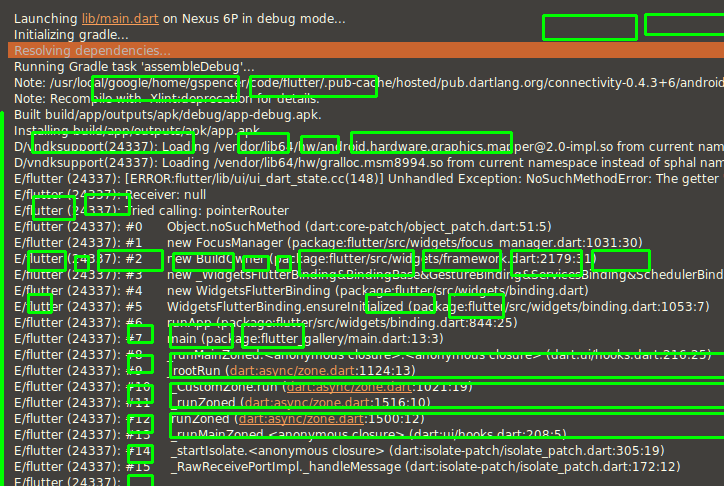

In [14]:
Image.fromarray(img)